In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


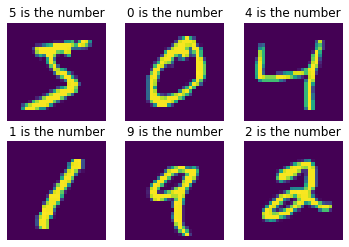

In [19]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i])
  plt.title("{} is the number".format(y_train[i]))
  plt.axis('off')

In [64]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [21]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [70]:
model=tf.keras.Sequential([
        Flatten(input_shape=(28,28)),
        Dense(32,activation='relu'),
        Dense(64,activation='relu'),
        Dense(128,activation='relu'),
        Dense(256,activation='relu'),
        Dense(256,activation='relu'),
       Dense(10,activation=tf.nn.softmax)
  ])

model.compile(optimizer='adam',
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3163 - accuracy: 0.9003
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1540 - accuracy: 0.9527
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1150 - accuracy: 0.9642
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0992 - accuracy: 0.9686
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0751 - accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0678 - accuracy: 0.9787
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0611 - accuracy: 0.9804
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0570 - accuracy: 0.9819
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.051

In [71]:
df=pd.DataFrame(history.history)
df['epoch']=history.epoch
df

,loss,accuracy,epoch
0,0.316260,0.900283,0
1,0.154025,0.952700,1
2,0.115016,0.964167,2
3,0.099223,0.968617,3
4,0.085722,0.973700,4
5,0.075079,0.976433,5
6,0.067837,0.978750,6
7,0.061072,0.980450,7
8,0.056960,0.981933,8
9,0.051305,0.983700,9


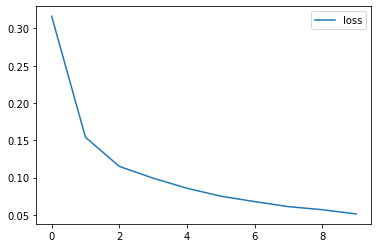

In [72]:
plt.plot(df['epoch'],df['loss'])
plt.legend(["loss"])

In [73]:
from sklearn.metrics import r2_score
pre_dict=(model.predict(x_test))
y_pred=np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
  y_pred[i]=(np.argmax(pre_dict[i]))
r2=r2_score(y_test,y_pred)
print("r2_score : ",format(r2))

r2_score :  0.9334422271447704
